# **Exercise Sheet 4:** Decision Trees

# Part A: Foundations & Concepts

Before diving into coding and implementing feature selection and regularization techniques, it's important to understand the fundamental concepts and motivations behind these methods.

Take a moment to reflect on these concepts yourself before seeking additional help from ChatGPT 😉 You're also encouraged to discuss these ideas with your classmates.

## 1. General Concepts

### a) What is a decision tree?

#### Your Answer:

#### Solution:
A decision tree is a flowchart-like model that makes predictions by asking a series of yes/no questions about the input features, splitting the data at each node until reaching a final prediction at the leaves.

### b) Draw a simple decision tree based on variable age and cholesterol to classify healthy vs. heart attack risk group.

- Example thresholds:
    - Age threshold 55 years
    - Cholesterol threshold 200 mg/dl for non risk group, 240 mg/dl for risk group

#### Your Answer:

#### Solution:

```
Age > 55?
├── Yes → Cholesterol > 240 mg/dL?
│   ├── Yes → High Risk (Heart Attack Risk Group)
│   └── No → Moderate Risk (Heart Attack Risk Group)
└── No → Cholesterol > 200 mg/dL?
    ├── Yes → Moderate Risk (Healthy Group)
    └── No → Low Risk (Healthy Group)
```

### c) Based on which criteria does a decision tree decide which features to split on and at what value?

#### Your Answer:

#### Solution:

At each step, a decision tree chooses the split that best separates the data into groups that are as similar as possible with respect to the outcome—whether that means having the same class (for classification) or similar numerical values (for regression).

In other words, the tree looks for the split that makes each group more “pure” (i.e., **minimizing mismatch between prediction and outcome**), using a measure that fits the specific task (Gini Impurity for classification and Mean Squared Error for regression).

### d) What is a random forest model? What does random and forest relate to?

#### Your Answer:

#### Solution:
- Random forest is an ensemble of multiple decision trees. It makes predictions by averaging (or majority voting) over all trees.
- Random relates to the fact that each tree is trained on a subset of the data.
- Forest relates to the collection of trees used.

### e) Random forest can be used only for continuous predictors and categorical outcomes. Correct?

#### Your Answer:

#### Solution:
No, random forest can handle both continuous and categorical predictors, and it can be used for both regression (continuous outcomes) and classification (categorical outcomes) tasks.

### f) What are strengths and weaknesses of random forest?

#### Your Answer:

#### Solution:

- Strengths:

    - Reduces overfitting compared to individual decision trees and works well out of the box
    - Handles missing values and maintains accuracy with large datasets
    - Provides feature importance rankings
    - Works well with both classification and regression tasks

- Weaknesses:

    - Less interpretable than single decision trees (black box)
    - Can overfit with very noisy data
    - Computationally expensive for large datasets

# Part B: Coding

Now let's apply our knowledge of decision trees and random forests! We start with some imports needed.

*Hint:* The functions imported from the Helper file may help you in certain tasks, but you are not required to use them. You can also write your own code to achieve the same results.

## Notes:
- I used a UCI dataset (gallstones), which is categorical, we can also change this to a regression dataset

In [1]:
# Standard Libraries
import pandas as pd
import warnings

# Scikit-learn: Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scikit-learn: Models and Metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Helper Functions
from helper import (
    plot_partial_dependence,
    simple_feature_importance
)

warnings.filterwarnings("ignore")

## 2. Decision Tree / Random Forest

### a) Load the dataset `gallstone.csv` and inspect it
- What outcome variable do you want to predict?
- What predictors do you want to use?

In [2]:
# Student Code

In [3]:
# Solution
df = pd.read_csv("gallstone.csv")

In [4]:
print(df.shape)
df.head()

(319, 39)


,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,High Density Lipoprotein (HDL),Triglyceride,Aspartat Aminotransferaz (AST),Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D
0,0,50,0,0,0,0,0,0,185,92.8,...,40.0,134.0,20.0,22.0,87.0,0.82,112.47,0.0,16.0,33.0
1,0,47,0,1,0,0,0,0,176,94.5,...,43.0,103.0,14.0,13.0,46.0,0.87,107.10,0.0,14.4,25.0
2,0,61,0,0,0,0,0,0,171,91.1,...,43.0,69.0,18.0,14.0,66.0,1.25,65.51,0.0,16.2,30.2
3,0,41,0,0,0,0,0,0,168,67.7,...,59.0,53.0,20.0,12.0,34.0,1.02,94.10,0.0,15.4,35.4
4,0,42,0,0,0,0,0,0,178,89.6,...,30.0,326.0,27.0,54.0,71.0,0.82,112.47,0.0,16.8,40.6


In [5]:
# Check the features and outcomes
print("Features:")
print(df.columns.tolist())

Features:
['Gallstone Status', 'Age', 'Gender', 'Comorbidity', 'Coronary Artery Disease (CAD)', 'Hypothyroidism', 'Hyperlipidemia', 'Diabetes Mellitus (DM)', 'Height', 'Weight', 'Body Mass Index (BMI)', 'Total Body Water (TBW)', 'Extracellular Water (ECW)', 'Intracellular Water (ICW)', 'Extracellular Fluid/Total Body Water (ECF/TBW)', 'Total Body Fat Ratio (TBFR) (%)', 'Lean Mass (LM) (%)', 'Body Protein Content (Protein) (%)', 'Visceral Fat Rating (VFR)', 'Bone Mass (BM)', 'Muscle Mass (MM)', 'Obesity (%)', 'Total Fat Content (TFC)', 'Visceral Fat Area (VFA)', 'Visceral Muscle Area (VMA) (Kg)', 'Hepatic Fat Accumulation (HFA)', 'Glucose', 'Total Cholesterol (TC)', 'Low Density Lipoprotein (LDL)', 'High Density Lipoprotein (HDL)', 'Triglyceride', 'Aspartat Aminotransferaz (AST)', 'Alanin Aminotransferaz (ALT)', 'Alkaline Phosphatase (ALP)', 'Creatinine', 'Glomerular Filtration Rate (GFR)', 'C-Reactive Protein (CRP)', 'Hemoglobin (HGB)', 'Vitamin D']


In [6]:
# Check for categorical features and their values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 39 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [7]:
# Prepare data for modeling
X = df.drop(columns=["Gallstone Status"])
y = df["Gallstone Status"]

### b) Split the dataset into training and test set (80% train, 20% test).

In [8]:
# Student Code

In [9]:
# Split data into training and test set (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### c) Fit a decision tree model on the training data. 
- Report the Accuracy for both the training and test data.
- Does the decision tree generalize well? 

In [10]:
# Student Code

In [11]:
# Create and fit a simple decision tree
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train);

In [12]:
# Compute Accuracy for both training and test data
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.72


We see perfect accuracy for the training data, however on the test set we are only around 72% accuracy. This is a sign of overfitting, which is a common problem with decision trees.

### d) Fit a random forest on the training data.
- Report the Accuracy for both the training and test data.
- Does the random forest generalize well?

In [13]:
# Student Code

In [14]:
# Create and fit a random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train);

In [15]:
# Compute Accuracy for both training and test data
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Training Accuracy (RF): {train_accuracy_rf:.2f}")
print(f"Test Accuracy (RF): {test_accuracy_rf:.2f}")

Training Accuracy (RF): 1.00
Test Accuracy (RF): 0.80


We see better generalization with the random forest model compared to the decision tree. The random forest achieves a higher accuracy on the test set (80%), indicating that it generalizes better to unseen data.

### e) Plot the feature importance plot for the random forest model and report the 4 most important features.

In [16]:
# Student Code

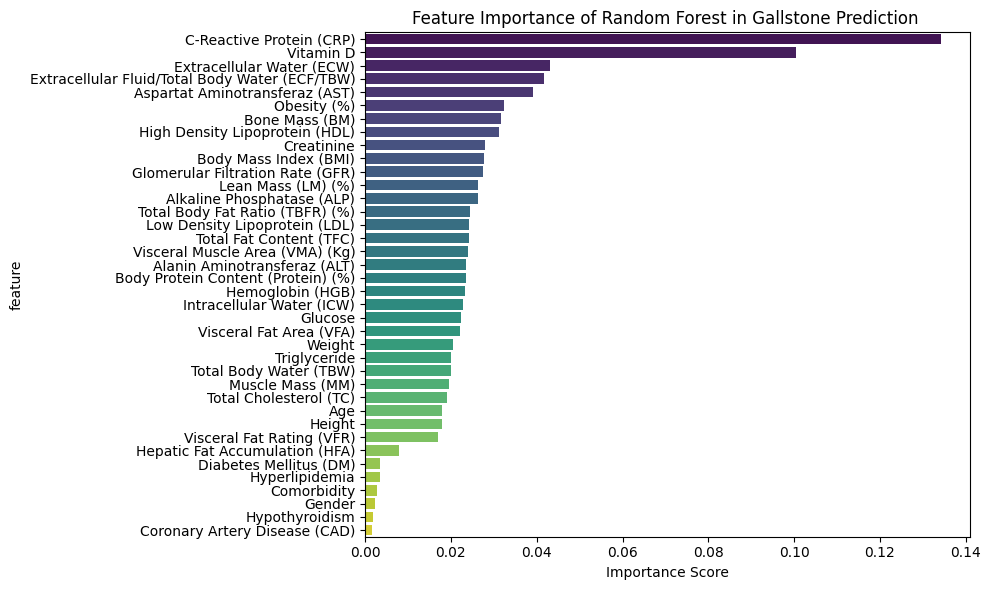

In [17]:
# Plot feature importance for random forest
simple_feature_importance(X, rf, title='Feature Importance of Random Forest in Gallstone Prediction ')

The 4 most important features are:
- C-Reactive Protein (CRP)
- Vitamin D
- Extracellular Water (ECW)
- Extracellular Fluid / Total Body Water (ECW/TBW)

Note: These values can be different as the random forest model is stochastic and the feature importance can vary with different runs.

### f) What does feature importance tell you about the model?

#### Your Answer:

#### Solution:
Feature importance indicates which features have the most influence on the model's predictions. In this case, it shows that CRP, Vitamin D, ECW, and ECW/TBW are the most significant predictors for gallstone disease in the dataset.

Add note: Feature iportance is not as interpretable as coefficients

### g) Plot a partial dependence plot for the 2 most important features.
- What can you conclude about the relationship between the most important features and the outcome variable?

In [18]:
# Student Code

Analyzing partial dependence for: ['C-Reactive Protein (CRP)', 'Vitamin D']


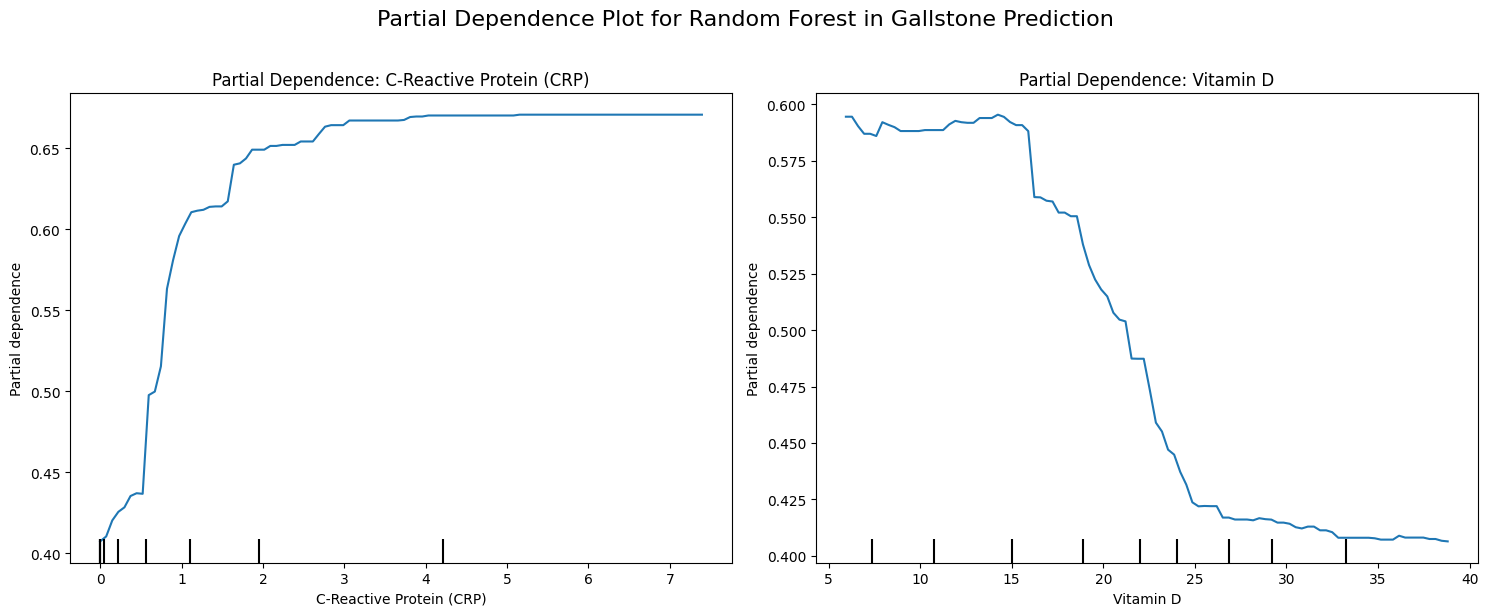

In [19]:
# Solution
plot_partial_dependence(X_train, rf, n_features=2, title='Partial Dependence Plot for Random Forest in Gallstone Prediction')

From the plot it is visible that as the C-Reactive Protein (CRP) levels increase, the probability of having gallstones also increases. Similarly, higher Vitamin D levels are associated with a lower probability of having gallstones.

### h) Report out-of-bag error for the random forest model.
- What does it reflect?
- Is it different from the test MSE?

In [20]:
# Student Code

#### Your Answer:


In [21]:
# Out of the bag-error of rf

# Note if oob_score was not used earlier we have to refit a new model with oob_score=True
rf = RandomForestClassifier(random_state=42, oob_score=True)
rf.fit(X_train, y_train)

print(f"Out of Bag Error: {rf.oob_score_:.2f}")

Out of Bag Error: 0.76


#### Solution:

Out-of-bag (OOB) error is an estimate of the model's performance on unseen data, calculated using the left out training data. It reflects how well the model generalizes to new data without needing a separate validation set. 
It is different from the test MSE and in our case slightly lower.